# **Representation of the quantum circuit for 4-qubit Grover search**

In [1]:
!pip install qiskit
!pip install pylatexenc

Quantum Circuit for 4-Qubit Grover Search (Target: |1011>)


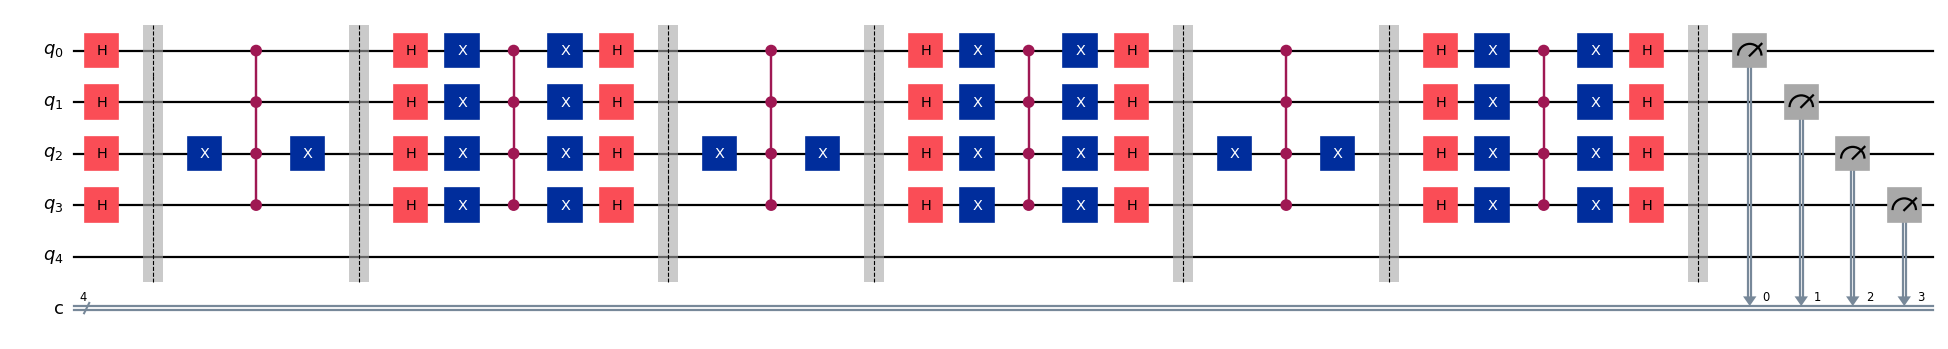

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import ZGate

# initialize quantum and classical registers
qr = QuantumRegister(5, 'q')  # 4 data qubits + 1 ancilla
cr = ClassicalRegister(4, 'c')  # Classical register for measurement
qc = QuantumCircuit(qr, cr)

# initialize superposition state
qc.h([0, 1, 2, 3])
qc.barrier()

# grover's iterations (three times)
for _ in range(3):
    # oracle for |1011> (phase flip on target)
    qc.x(2)  # Flip q2 to convert |1011> to |1111>

    # 3-controlled Z gate decomposition (controls: q0,q1,q2; target: q3)
    ccx1 = ZGate().control(3)
    qc.append(ccx1, [qr[0], qr[1], qr[2], qr[3]])

    qc.x(2)  # Revert q2
    qc.barrier()

    # diffusion operator
    qc.h([0, 1, 2, 3])
    qc.x([0, 1, 2, 3])

    # 3-controlled Z gate (same decomposition)
    ccx2 = ZGate().control(3)
    qc.append(ccx2, [qr[0], qr[1], qr[2], qr[3]])

    qc.x([0, 1, 2, 3])
    qc.h([0, 1, 2, 3])
    qc.barrier()

qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

print("Quantum Circuit for 4-Qubit Grover Search (Target: |1011>)")
qc.draw('mpl', fold=-1, scale=0.8)  #returns matplotlib figure

In [11]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import ZGate

# Crear el circuito como antes
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qr, cr)

qc.h([0, 1, 2, 3])
qc.barrier()

for _ in range(3):
    qc.x(2)
    oracle = ZGate().control(3)
    qc.append(oracle, [qr[0], qr[1], qr[2], qr[3]])
    qc.x(2)
    qc.barrier()

    qc.h([0, 1, 2, 3])
    qc.x([0, 1, 2, 3])
    diffuser = ZGate().control(3)
    qc.append(diffuser, [qr[0], qr[1], qr[2], qr[3]])
    qc.x([0, 1, 2, 3])
    qc.h([0, 1, 2, 3])
    qc.barrier()

qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

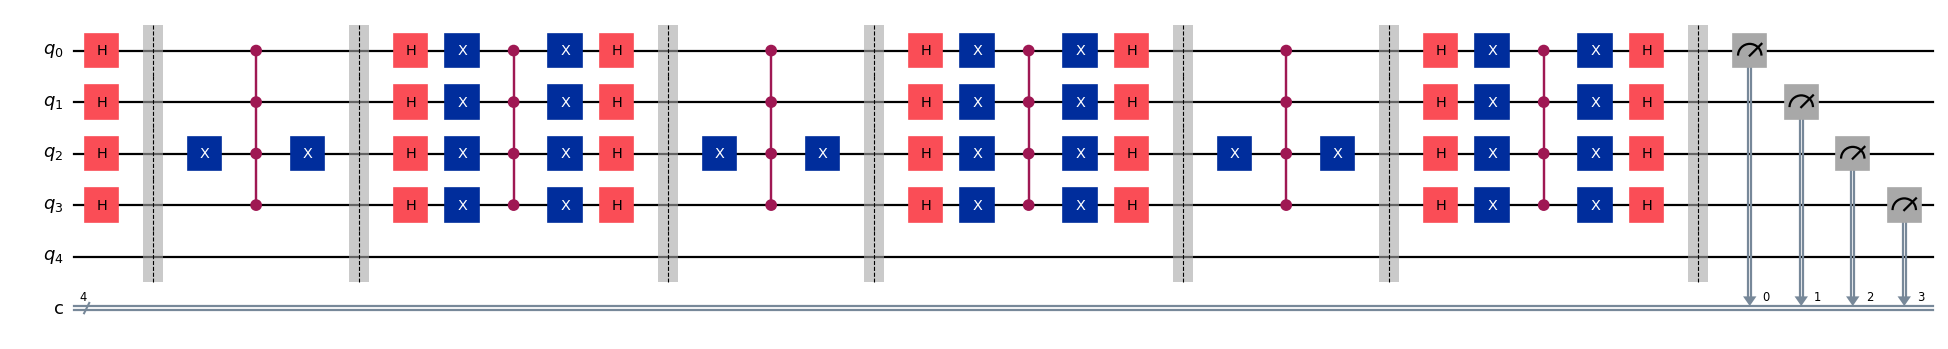

In [12]:
qc.draw('mpl', fold=-1, scale=0.8)